# Stellar Classification with Logistic Regression and K-Means

Dataset: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

I use a Stellar Classification Dataset to build machine learning classification models. Specifically, I apply Logistic Regression and K-Means algorithms to predict the correct class (y label) for various celestial objects (galaxies, QSOs, stars). These predictions are based on a set of features: alpha, delta, u, g, r, i, z, and redshift. These features have scientific significance:

- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- u = Ultraviolet filter in the photometric system
- g = Green filter in the photometric system
- r = Red filter in the photometric system
- i = Near Infrared filter in the photometric system
- z = Infrared filter in the photometric system
- redshift = redshift value based on the increase in wavelength


Importing the necessary libraries

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

Importing the Stellar Classification Dataset into a pandas dataframe

In [2]:
stars = pd.read_csv('https://raw.githubusercontent.com/AlessandroSciorilli/Stellar_Classification/main/star_classification.csv')
stars

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


Checking the shape of the dataset

In [3]:
stars.shape

(100000, 18)

Checking the features in the dataframe

In [4]:
stars.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Checking for missing data

In [5]:
stars.isnull().values.any()

False

No data is missing

In [6]:
stars.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Inspecting what data types are stored in the dataframe. The dataframe contains 3 columns of floats, 4 columns of integers and 5 columns of strings.

In [7]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Dropping all the ID Columns - not relevant for the models

In [8]:
stars.drop(columns=['obj_ID','run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate','fiber_ID', 'MJD'], inplace=True)

In [9]:
stars

,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040


Checking the distribution of categorical data

In [10]:
print(stars['class'].value_counts())

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


### Plot 1 - Number of Celestial Objects Per Class

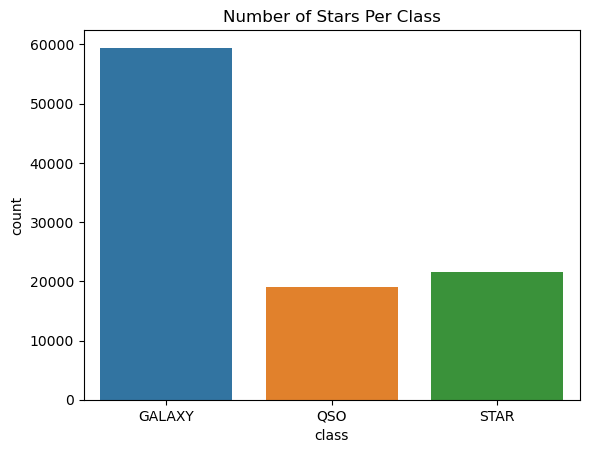

In [11]:
sns.countplot(x='class', data = stars)
plt.title('Number of Stars Per Class')
plt.show()

### Plot 2 - Boxplot showing Class vs Redshift

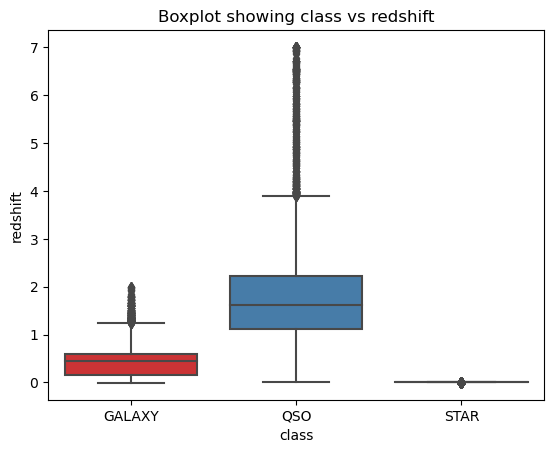

In [12]:
sns.boxplot(x='class', y ='redshift', palette='Set1', data = stars).set(title='Boxplot showing class vs redshift')
plt.show()

### Plot 3 - Average Alpha and Delta by Class

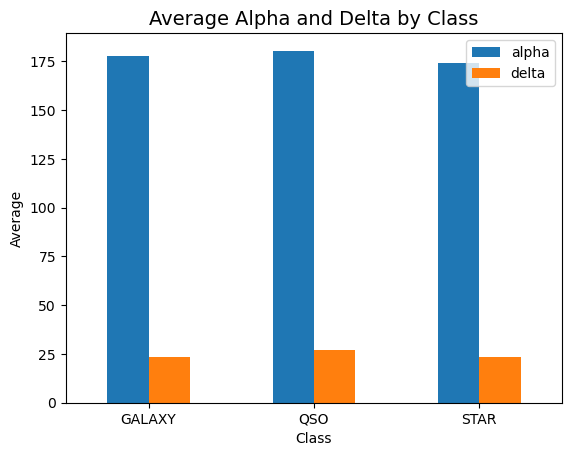

In [13]:
# Calculating mean values for 'alpha' and 'delta' columns based on classes
means1 = stars.groupby('class')[['alpha', 'delta']].mean()

# Plotting the mean values directly from the grouped DataFrame
ax = means1.plot(kind='bar')

# Setting plot title and labels
ax.set_title('Average Alpha and Delta by Class', size = 14)
ax.set_xlabel('Class')
ax.set_ylabel('Average')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()


### Plot 4 - Average u, g, r, i and z by Class

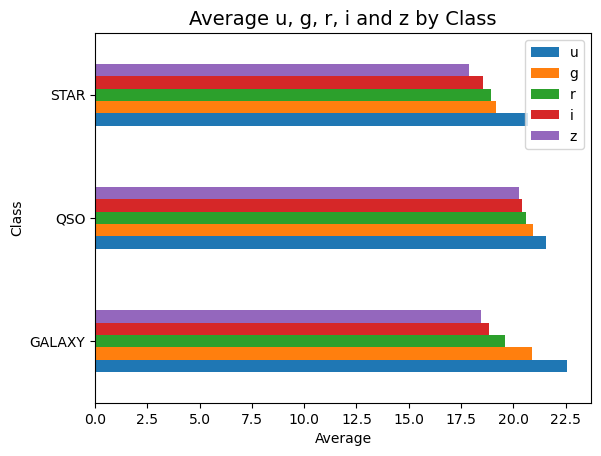

In [14]:
# Calculating mean values for u', 'g', 'r', 'i', 'z' columns based on classes
means2 = stars.groupby('class')[['u', 'g', 'r', 'i', 'z']].mean()

# Plotting the mean values directly from the grouped DataFrame
bx = means2.plot(kind='barh')

# Set plot title and labels
bx.set_title('Average u, g, r, i and z by Class', size = 14)
bx.set_xlabel('Average')
bx.set_ylabel('Class')

# Increasing the number of grid values on the x-axis
bx.locator_params(axis='x', nbins=10)
plt.show()

Getting the correlation of the columns

In [15]:
stars.corr()

C:\Users\aless\AppData\Local\Temp\ipykernel_18748\1445004321.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stars.corr()


,alpha,delta,u,g,r,i,z,redshift
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.001667
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.031638
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.014309
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.022954
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.433241
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.492383
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.030380
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,1.000000


### Plot 5 - Correlation Matrix

C:\Users\aless\AppData\Local\Temp\ipykernel_18748\4190572633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = stars.corr()


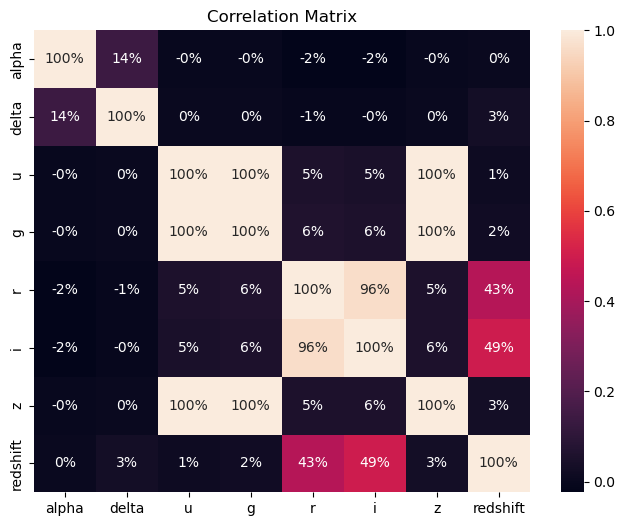

In [16]:
corr_matrix = stars.corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, fmt='.0%')
plt.title('Correlation Matrix')
plt.show()

## Logistic Regression

Separating the features from the labels 

In [17]:
X = stars[['alpha', 'delta', 'u', 'g', 'r','i', 'z','redshift']].values
y = stars[['class']].values

Splitting the Dataset into Training and Test Sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Rescaling the dataset

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting (Training) the model to the training dataset

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classifier = LogisticRegression()
#Note the use of .vales and .ravel() 
#.values is used to extract the dataframe values to a numpy array

#ravel() is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array.
#The returned array has the same data type as the source array or input array.
classifier.fit(X_train, y_train.ravel())

LogisticRegression()

Performing 5-Fold Cross Validation

In [21]:
k = 5
kf = KFold(n_splits=k)
result = cross_val_score(classifier, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

 Avg accuracy:0.9556142857142857


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using the model to make predictions on the test dataset

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Getting a set of the Predicted probabilities
probs_y=classifier.predict_proba(X_test)

Generating a dataframe showing the actual records, the predicted output from the model and the corresponding probabilities

In [23]:
#Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['GALAXY(%)', 'STAR(%)', 'QSO(%)']])

In [24]:
#Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [25]:
#Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [26]:
#Creating a dataframe with the actual values, the predicted values, and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In the dataframe below, y_test represents the actual records, y_pred represents the predicted records from the model, and the other columns represented the probabilites of the predictions

In [27]:
comparison_of_true_pred

,y_test,y_pred,GALAXY(%),STAR(%),QSO(%)
0,GALAXY,GALAXY,99.199236,0.800764,2.326268e-23
1,QSO,QSO,33.084167,66.915833,7.630295e-24
2,GALAXY,GALAXY,92.846853,7.153147,3.390798e-20
3,GALAXY,GALAXY,99.384103,0.615897,4.901728e-10
4,GALAXY,GALAXY,99.370856,0.629040,1.033506e-04
...,...,...,...,...,...
29995,GALAXY,GALAXY,93.107317,6.892683,3.152696e-24
29996,QSO,QSO,8.609825,91.390175,2.943010e-40
29997,STAR,STAR,12.271435,0.327144,8.740142e+01
29998,GALAXY,GALAXY,86.251635,13.748365,2.583461e-25


Generating a confusion matrix to determine how effective our model is

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17175   283   351]
 [  656  4980     5]
 [    1     3  6546]]


### Plot 6 - Confusion Matrix

Printing a Visualization of the confusion matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

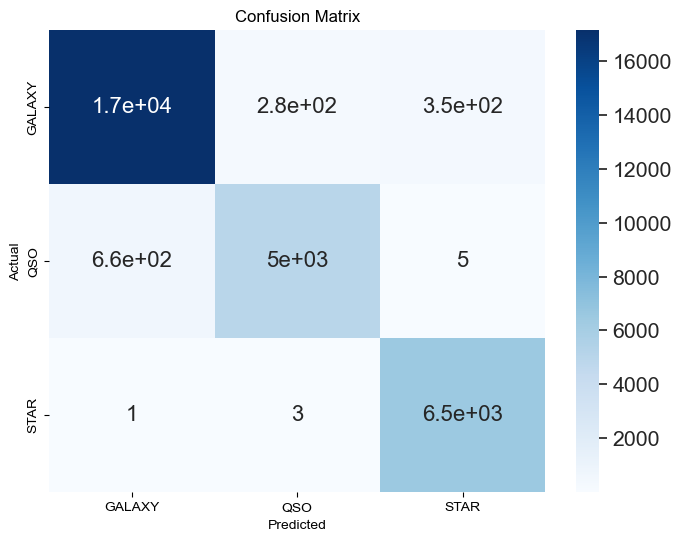

In [29]:
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,6))
plt.title('Confusion Matrix')
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Printing the classification report

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.96      0.96      0.96     17809
         QSO       0.95      0.88      0.91      5641
        STAR       0.95      1.00      0.97      6550

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000



## K-Means

Importing libraries for K-Means

In [31]:
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

### Plot 7 - Distortion Score Elbow for KMeans Clustering

Determining Optimal number of clusters using Elbow method. With elbow method the objective is to find k where SSE decreases most rapidly. Therefore, from figure it can be seen that the optimal number of clusters is 4. This is different from the actual number of classes in the dataset. 

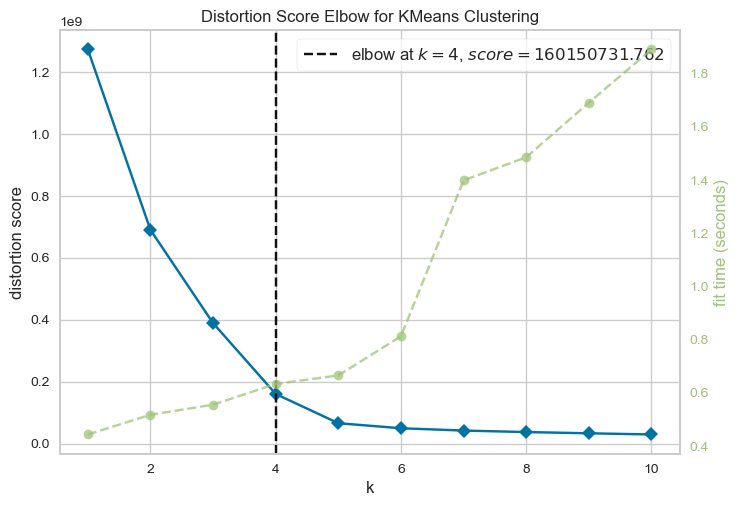

In [32]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

Perform K-Means clustering using sklearn

In [33]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=4, random_state=15)

# call fit method with data 
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_ 

# cluster label for each data point
labels = km_model.labels_ 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot 8 - Clusters Visualization

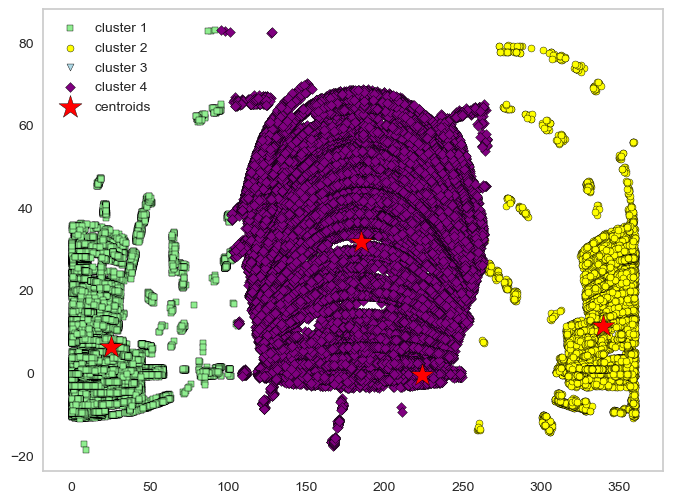

In [34]:
plt.figure(figsize=(8,6))

plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[km == 3, 0], X[km == 3, 1],
    s=25, c='purple',
    marker='D', edgecolor='black',
    label='cluster 4'
)

# Visualize centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()


#### Report Purity Score

Computing purity score. Purity score is computed using Ground Truth or External accessment. Since, the dataset 
consists of a true class label, the accuracy of the cluster label computed using KMeans is compared 
against the true label class. 

In [35]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 59.45%


#### Kmeans using pyclustering for different Distance Metrics
- Here, K-Means is performed using pyclustering library for various distance metrics like Manhattan, Chebyshev, euclidean etc.
- Minkowski distance is just the generalisation of euclidean (p=2), manhattan (p=1) and chebyshev distance (p=Inf).
- Although for pyclustering, initial centers can be initialised using k++ algorithm, but, I have randomly initialised the - initial center to compare the results with sklearn kmeans.
- Highest purity is achieved using Chi-Square as the distance metric.

In [36]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 59.44%
The purity score for squared euclidean distance is 59.44%
The purity score for manhattan distance is 59.44%
The purity score for chebyshev distance is 59.44%
The purity score for canberra distance is 59.44%
The purity score for chi-square distance is 59.44%
